In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch


from PIL import Image
import torch
from torchvision import models, transforms
from sklearn.neighbors import NearestNeighbors

import random
import os
import glob

import faiss

import clip
from PIL import Image

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Dataset

In [9]:
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, utils
from skimage import io, transform

### AID

In [48]:
class AID(Dataset):

    def __init__(self, root_dir, transform=None):

        self.label_map = {}

        self.info = []
        i = 0
        for root, dirs, files in os.walk(root_dir):
            
            for file in files:
                
                if file.endswith((".jpg", ".tif", ".png", "jpeg")):
                    file_path = os.path.join(root, file)
                    label = root.split('/')[-1]
                    self.info.append((file_path, label))


                    try:
                        self.label_map[label]
                    except KeyError:
                        self.label_map[label.lower()] = i
                        i += 1

        random.shuffle(self.info)
        self.transform = transform


    def map_labels(self, label):
        return self.label_map[label]





    def __len__(self):
        return len(self.info)


    def __getitem__(self, idx):
        img_path, label = self.info[idx]

        label = self.map_labels(label.lower())

        img = io.imread(img_path)[:,:,:3]
        img = img / 255.
        
        return img, label

In [49]:
dataset = AID('datasets/AID')
label_map = dataset.label_map

'''
# Parameters
batch_size = 32
validation_split = 0.2
shuffle_dataset = True
random_seed = 42
# Create train and validation splits
dataset_size = len(dataset)
val_size = int(validation_split * dataset_size)
train_size = dataset_size - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle_dataset)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
'''


class_map = inv_map = {v: k for k, v in label_map.items()}

In [50]:
dataset = AID('datasets/AID')

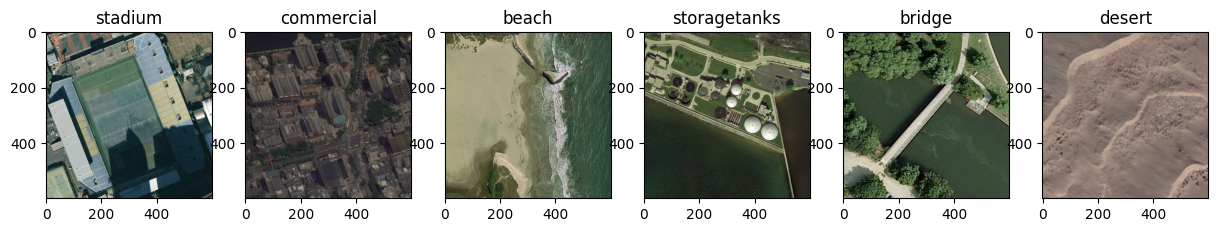

In [52]:
n = 6
fig, axs = plt.subplots(1, n, figsize=(15, 5)) 

for i in range(n):
    img, label = dataset[i]
    label = class_map[label]

    axs[i].imshow(img)
    axs[i].set_title(label)

### FAIR1M

In [209]:
class FAIR1M(Dataset):

    def __init__(self, root_dir, transform=None):

        self.label_map = {
            'ship': 0,
            'airplane': 1,
            'neighborhood': 2,
        }

        self.info = []
        for root, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith((".jpg", ".tif", ".png", "jpeg")):
                    file_path = os.path.join(root, file)
                    label = root.split('/')[-1]
                    self.info.append((file_path, label))

        random.shuffle(self.info)
        self.transform = transform

    def map_labels(self, label):
        return self.label_map[label]





    def __len__(self):
        return len(self.info)


    def __getitem__(self, idx):
        img_path, label = self.info[idx]

        label = self.map_labels(label.lower())

        img = io.imread(img_path)[:,:,:3]
        img = img / 255.
        
        return img, label

In [218]:
dataset = FAIR1M('datasets/FAIR1M_partial')


'''
# Parameters
batch_size = 32
validation_split = 0.2
shuffle_dataset = True
random_seed = 42
# Create train and validation splits
dataset_size = len(dataset)
val_size = int(validation_split * dataset_size)
train_size = dataset_size - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle_dataset)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
'''


class_map = {
    0: 'ship',
    1: 'airplane',
    2: 'neighborhood',
}

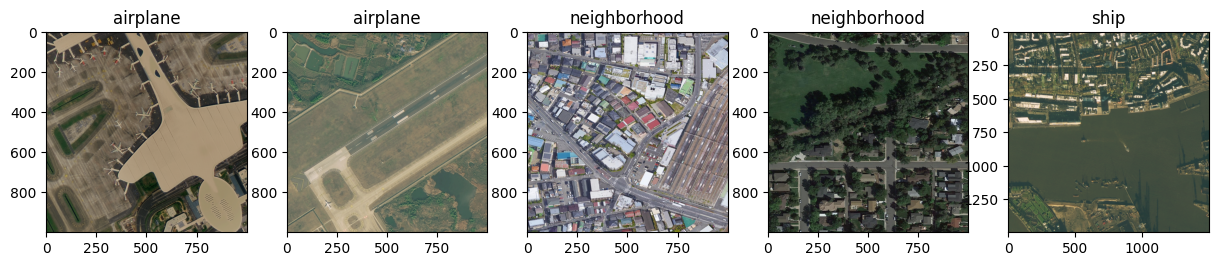

In [219]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5)) 

for i in range(5):
    img, label = dataset[i]
    label = class_map[label]

    axs[i].imshow(img)
    axs[i].set_title(label)

### RESISC45

In [227]:
class RESISC45(Dataset):

    def __init__(self, root_dir, transform=None):

        self.label_map = {
            'ship': 0,
            'airplane': 1,
            'bridge': 2,
        }

        self.info = []
        for root, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith((".jpg", ".tif", ".png", "jpeg")):
                    file_path = os.path.join(root, file)
                    label = root.split('/')[-1]
                    self.info.append((file_path, label))

        random.shuffle(self.info)
        self.transform = transform

    def map_labels(self, label):
        return self.label_map[label]





    def __len__(self):
        return len(self.info)


    def __getitem__(self, idx):
        img_path, label = self.info[idx]

        label = self.map_labels(label.lower())

        img = io.imread(img_path)[:,:,:3]
        img = img / 255.
        
        return img, label

In [228]:
dataset = RESISC45('datasets/RESISC45_partial')

In [229]:
class_map = {
    0: 'ship',
    1: 'airplane',
    2: 'neighborhood',
}

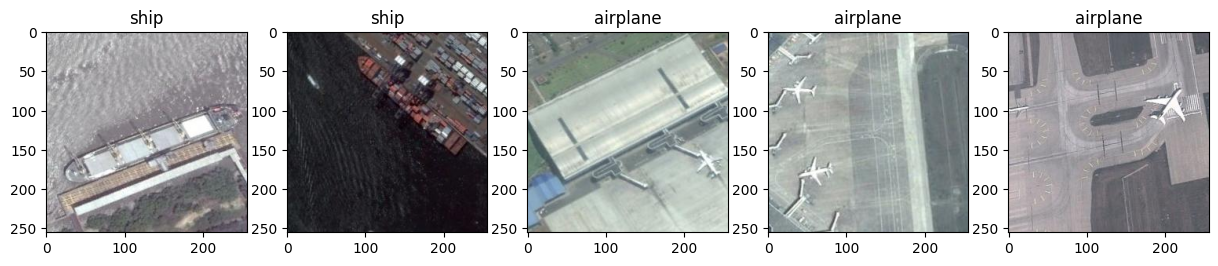

In [230]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5)) 

for i in range(5):
    img, label = dataset[i]
    label = class_map[label]

    axs[i].imshow(img)
    axs[i].set_title(label)

### Sentinel-2 ship

In [238]:
class SS2(Dataset):

    def __init__(self, root_dir, transform=None):

        self.label_map = {
            'ship': 0,
            'noship': 1,
        }

        self.info = []
        for root, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith((".jpg", ".tif", ".png", "jpeg")):
                    file_path = os.path.join(root, file)
                    label = root.split('/')[-1]
                    self.info.append((file_path, label))

        random.shuffle(self.info)
        self.transform = transform

    def map_labels(self, label):
        return self.label_map[label]





    def __len__(self):
        return len(self.info)


    def __getitem__(self, idx):
        img_path, label = self.info[idx]

        label = self.map_labels(label.lower())

        img = io.imread(img_path)[:,:,:3]
        img = img / 255.
        
        return img, label

In [245]:
dataset = SS2('datasets/Sentinel2_partial')

In [246]:
class_map = {
    0: 'ship',
    1: 'noship',
}

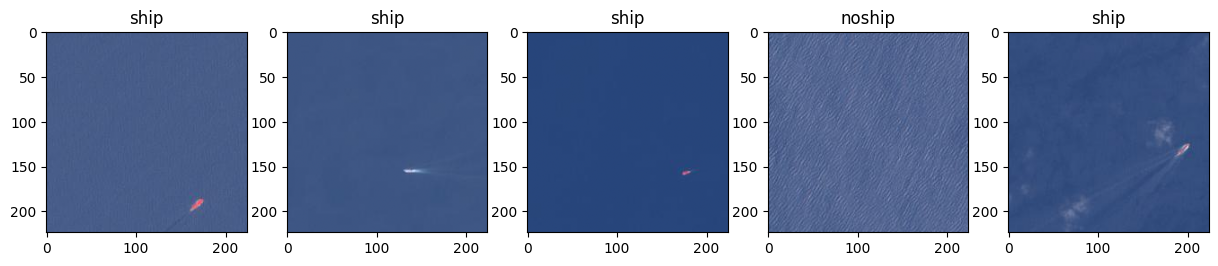

In [247]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5)) 

for i in range(5):
    img, label = dataset[i]
    label = class_map[label]

    axs[i].imshow(img)
    axs[i].set_title(label)

# Model
- https://github.com/mlfoundations/open_clip
- https://github.com/openai/CLIP/blob/main/README.md
- CLIP

In [3]:
model, preprocess = clip.load("ViT-B/32", device=device)

### Image Embedding

In [4]:
# Walk into directoies to find images and convert them to vectors
image_paths = []
features = []
for root, dirs, files in os.walk('datasets/'):
    for file in files:
        if file.endswith((".jpg", ".tif", ".png")):
            file_path = os.path.join(root, file)
            image_paths.append(file_path)

            img = Image.open(file_path)
            
            with torch.no_grad():
                feature = model.encode_image(preprocess(img).unsqueeze(0).to(device)).detach().cpu().numpy()
            features.append(feature)


print(len(features), ' Images Found!')
f = np.concatenate(features, axis=0)

15071  Images Found!


- Took 39s on NVIDIA 3060

### NN Search

In [33]:
# Text Embedding (Query feature)
query = 'parking'
query = clip.tokenize(query).to(device)
query = model.encode_text(query).detach().cpu()


In [34]:
# NN Search
k = 20
neigh = NearestNeighbors(n_neighbors=k, algorithm='brute')

In [35]:
neigh.fit(f)
distances, indices = neigh.kneighbors(query)

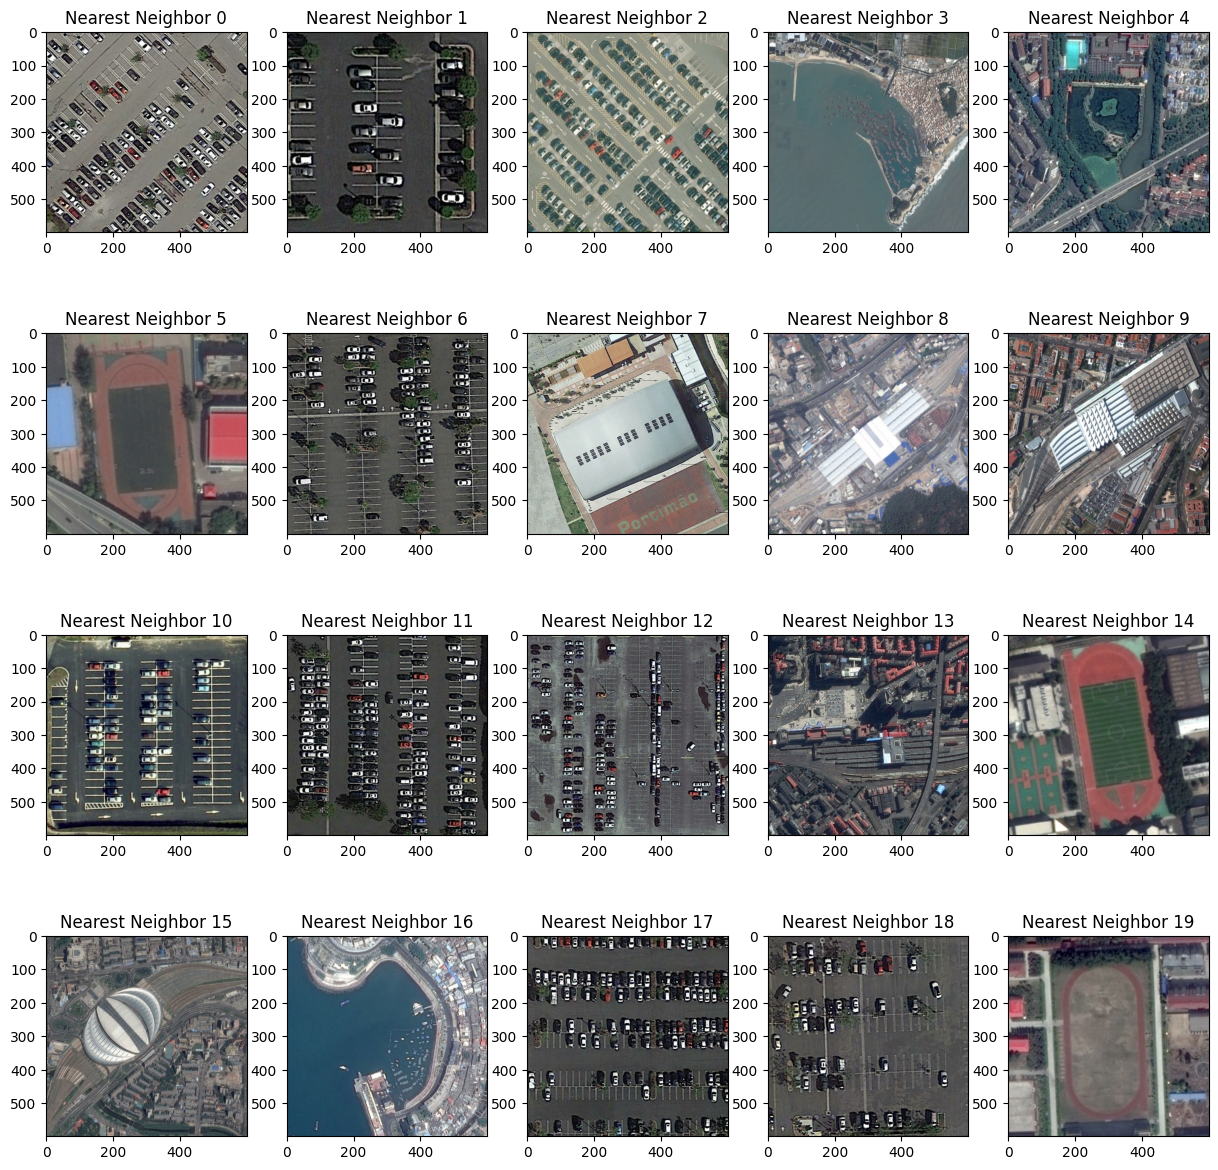

In [36]:

# Plot query image
rows, columns = 4, 5
fig, axs = plt.subplots(rows, columns, figsize=(15, 15))


n = 0
for i in range(rows):
    for j in range(columns):

        axs[i][j].imshow(Image.open(image_paths[indices[0][n]]))
        axs[i][j].set_title(f'Nearest Neighbor {n}')
        n += 1
plt.show()